In [1]:
import torch


Layer 1 outputs: 0.03999999910593033 0.0 0.5600000023841858
Layer 2 outputs: 0.5374298095703125 0.45512109994888306
Combined output (tanh): 0.9205395579338074
Final Output y: 1.5808093547821045

=== Gradients ===
dy/dx   = 0.23465721309185028
dy/dw00 = 0.16023726761341095
dy/dw10 = 0.039834827184677124
dy/dw20 = 0.9205395579338074


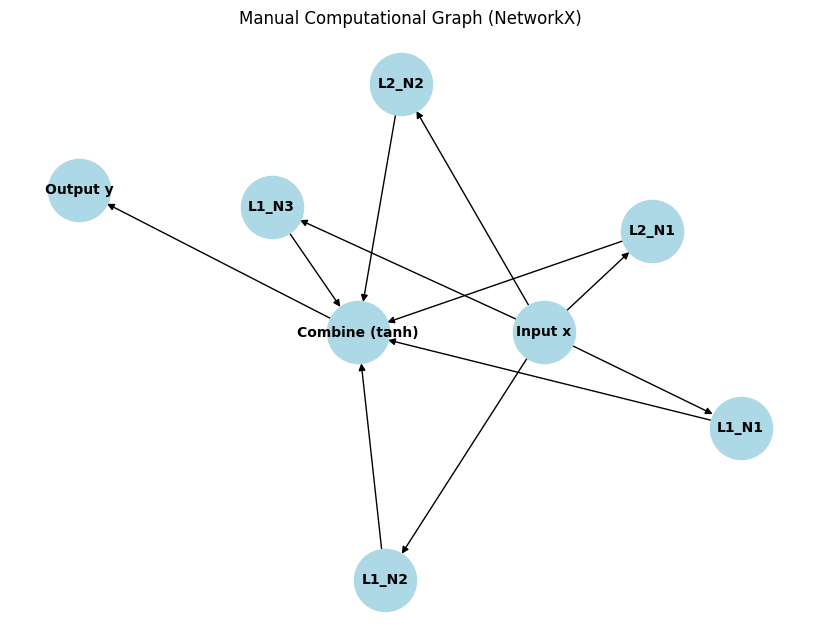

In [ ]:
# Computational Graph Implementation with PyTorch + Visualization
# Step-by-step forward + backward pass
import torch
from torchviz import make_dot
import networkx as nx
import matplotlib.pyplot as plt

# 1) Input 
x = torch.tensor(0.7, requires_grad=True)

#2) Define weights and biases
# Layer 1 (3 neurons, ReLU)
w00, b00 = torch.tensor(0.2, requires_grad=True), torch.tensor(-0.1, requires_grad=True)
w01, b01 = torch.tensor(-0.3, requires_grad=True), torch.tensor(0.05, requires_grad=True)
w02, b02 = torch.tensor(0.8, requires_grad=True), torch.tensor(0.0, requires_grad=True)

# Layer 2 (2 neurons, Sigmoid)
w10, b10 = torch.tensor(0.5, requires_grad=True), torch.tensor(-0.2, requires_grad=True)
w11, b11 = torch.tensor(-0.4, requires_grad=True), torch.tensor(0.1, requires_grad=True)

# Output layer (1 neuron, linear)
w20, b20 = torch.tensor(1.5, requires_grad=True), torch.tensor(0.2, requires_grad=True)

# 3) Forward pass
# Layer 1
z1_0 = w00 * x + b00
z1_1 = w01 * x + b01
z1_2 = w02 * x + b02

a1_0 = torch.relu(z1_0)
a1_1 = torch.relu(z1_1)
a1_2 = torch.relu(z1_2)

print("Layer 1 outputs:", a1_0.item(), a1_1.item(), a1_2.item())

# Layer 2
z2_0 = w10 * x + b10
z2_1 = w11 * x + b11

a2_0 = torch.sigmoid(z2_0)
a2_1 = torch.sigmoid(z2_1)

print("Layer 2 outputs:", a2_0.item(), a2_1.item())

# Combine + Tanh
s1 = a1_0 + a1_1 + a1_2
s2 = a2_0 + a2_1
combined_pre = s1 + s2
combined = torch.tanh(combined_pre)

print("Combined output (tanh):", combined.item())

# Output layer (linear)
y = w20 * combined + b20
print("Final Output y:", y.item())

#  4) Backprop 
y.backward()

print("\n=== Gradients ===")
print("dy/dx   =", x.grad.item())
print("dy/dw00 =", w00.grad.item())
print("dy/dw10 =", w10.grad.item())
print("dy/dw20 =", w20.grad.item())

#  5) Visualization 
# --- Option 1: Torchviz (autograd graph) ---
dot = make_dot(y, params={
    "x": x, "w00": w00, "w01": w01, "w02": w02,
    "w10": w10, "w11": w11, "w20": w20
})
dot.format = "png"
dot.render("graph")

# --- Option 2: NetworkX (manual layer diagram) ---
G = nx.DiGraph()

# Nodes
G.add_node("Input x")
G.add_nodes_from(["L1_N1", "L1_N2", "L1_N3"])
G.add_nodes_from(["L2_N1", "L2_N2"])
G.add_node("Combine (tanh)")
G.add_node("Output y")

# Edges
for n in ["L1_N1", "L1_N2", "L1_N3"]:
    G.add_edge("Input x", n)
for n in ["L2_N1", "L2_N2"]:
    G.add_edge("Input x", n)

for n in ["L1_N1", "L1_N2", "L1_N3", "L2_N1", "L2_N2"]:
    G.add_edge(n, "Combine (tanh)")

G.add_edge("Combine (tanh)", "Output y")

# Draw
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue",
        node_size=2000, font_size=10, font_weight="bold", arrows=True)
plt.title("Manual Computational Graph (NetworkX)")
plt.show()


Final output = 0.6710296869277954
d(output)/dx = 0.03061959706246853


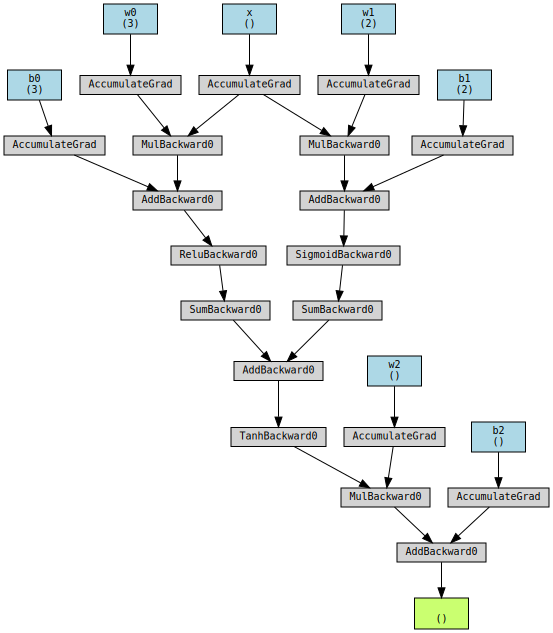

In [9]:
import torch
from torchviz import make_dot

def computational_graph_with_viz(x_value=1.7):
    # Input scalar
    x = torch.tensor(x_value, requires_grad=True)

    # Weights & biases
    w0 = torch.tensor([0.2, -0.5, 0.3], requires_grad=True)
    b0 = torch.tensor([0.1, 0.2, -0.1], requires_grad=True)
    w1 = torch.tensor([0.4, -0.2], requires_grad=True)
    b1 = torch.tensor([0.05, -0.05], requires_grad=True)
    w2 = torch.tensor(0.7, requires_grad=True)
    b2 = torch.tensor(0.0, requires_grad=True)

    # Forward Pass
    z1 = w0 * x + b0
    a1 = torch.relu(z1)

    z2 = w1 * x + b1
    a2 = torch.sigmoid(z2)

    combined = torch.sum(a1) + torch.sum(a2)
    a_combined = torch.tanh(combined)

    output = w2 * a_combined + b2

    # Backward Pass
    output.backward()

    # Print results
    print("Final output =", output.item())
    print("d(output)/dx =", x.grad.item())

    # Visualize computational graph
    dot = make_dot(output, params={
        'x': x, 'w0': w0, 'b0': b0,
        'w1': w1, 'b1': b1,
        'w2': w2, 'b2': b2
    })
    return dot

# Run and render graph
computational_graph_with_viz(1.7)
